In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
file = '../ReplaceVal/0133test.csv'

In [4]:
df = pd.read_csv(file)

In [5]:
#df = df.loc[(df.q3 != 12) &(df.q3 != 11)&(df.q3 != 13) & (df.q3 != 14) & (df.q3 != 29) &(df.q3 != 26)& (df.q3 != 30) & (df.q3 != 21)]

In [6]:
df = df.loc[(df.q3 != 12) & (df.q3 != 14) & (df.q3 != 29) &(df.q3 != 26)& (df.q3 != 30) & (df.q3 != 21) & (df.q3 != 47)]

In [7]:
#df = df.loc[df.q3 != (12 or 14 or 21 or 26 or 29 or 30 or 47)]

In [8]:
#df = df.loc[df.q3_toshiruikei != (1)]

In [9]:
#df = df.loc[df.q3_toshiruikei == 4]

In [10]:
df = df.loc[(df.q15_3 != 50) & (df.q15_3 != 98) & (df.q15_3 != 99) &(df.q15_3 != 49)]

In [11]:
df.q3.unique()

array([10, 16, 11, 40, 38,  4, 43,  7,  5,  1,  6, 46, 50,  9,  8, 37, 45,
       20, 34, 13,  2,  3, 32, 31, 35, 36, 42, 19, 28, 27, 44, 15, 24, 33,
       25, 17, 22, 18, 23, 39, 41])

In [12]:
df['moved_pref_first_job'] = 0
df.loc[df.q3 != df.q15_3, 'moved_pref_first_job'] = 1

In [13]:
df['moved_within_pref_first_job'] = 0

In [14]:
df.loc[(df.q3 == df.q15_3) & (df.q3_toshiruikei != df.q15_3_toshiruikei), 'moved_within_pref_first_job'] = 1

In [15]:
df['moved_first_job'] = df['moved_pref_first_job'] + df['moved_within_pref_first_job']

In [16]:
year = 1981

In [17]:
df['birth_year'] = year - df.q1

In [18]:
df['counts'] = 1

In [19]:
df['first_job_year'] = df['birth_year'] + df.q15_9_1

In [20]:
df['new_middle'] = 0
df.loc[df.q26_1 == 7, 'new_middle'] = 1

In [21]:
df['new_high'] = 0
df.loc[df.q26_1 == 8, 'new_high'] = 1

In [22]:
df['new_junior_college'] = 0
df.loc[df.q26_1 == 9, 'new_junior_college'] = 1

In [23]:
df['new_college'] = 0
df.loc[df.q26_1 == 10, 'new_college'] = 1

In [24]:
df['old_elementary'] = 0
df.loc[df.q26_1 == 1, 'old_elementary'] = 1

In [25]:
df['old_upper_elementary'] = 0
df.loc[df.q26_1 == 2, 'old_upper_elementary'] = 1

In [26]:
df['old_vocational'] = 0
df.loc[df.q26_1 == 3, 'old_vocational'] = 1

In [27]:
df['old_middle'] = 0
df.loc[df.q26_1 == 4, 'old_middle'] = 1

In [28]:
df['old_high'] = 0
df.loc[df.q26_1 == 5, 'old_high'] = 1

In [29]:
df['old_college'] = 0
df.loc[df.q26_1 == 6, 'old_college'] = 1

In [30]:
df['high'] = df['new_high'] + df['old_high']

In [31]:
df['middle'] = df['new_middle'] + df['old_middle'] + df['old_vocational'] + df['old_upper_elementary']

In [32]:
df['college'] = df['new_college'] + df['old_college']

In [33]:
df['first_job_school'] = 0
df.loc[df.q15_8 == 3, 'first_job_school'] = 1

df['first_job_pub_emp'] = 0
df.loc[df.q15_8 == 4, 'first_job_pub_emp'] = 1

df['first_job_conn'] = 0
df.loc[df.q15_8 == 1, 'first_job_conn'] = 1
df.loc[df.q15_8 == 2, 'first_job_conn'] = 1

df['first_job_adv'] = 0
df.loc[df.q15_8 == 5, 'first_job_adv'] = 1

df['first_job_other'] = 0
df.loc[df.q15_8 == 6, 'first_job_other'] = 1

df['first_job_self'] = 0
df.loc[df.q15_8 == 7, 'first_job_self'] = 1

In [34]:
df['first_job_school'] = 0
df.loc[df.q15_8 == 3, 'first_job_school'] = 1

In [35]:
df['first_job_pub_emp'] = 0
df.loc[df.q15_8 == 4, 'first_job_pub_emp'] = 1

In [36]:
df['first_job_conn'] = 0
df.loc[df.q15_8 == 1, 'first_job_conn'] = 1
df.loc[df.q15_8 == 2, 'first_job_conn'] = 1

In [37]:
df['first_job_adv'] = 0
df.loc[df.q15_8 == 5, 'first_job_adv'] = 1

In [38]:
df['first_job_other'] = 0
df.loc[df.q15_8 == 6, 'first_job_other'] = 1

In [39]:
df['first_job_self'] = 0
df.loc[df.q15_8 == 7, 'first_job_self'] = 1

In [40]:
def plot_graphs(year_column, data_column):
    
    _df = df[[year_column, data_column, 'counts']].copy()
    
    if year_column == 'first_job_year':
        _df = _df.loc[_df[year_column] <= 1975]
    
    _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()
    _df_group['data_ratio'] = _df_group[data_column] / _df_group.counts
    _df_group['ratio_SMA_5'] = _df_group['data_ratio'].rolling(window = 5).mean()
    
    fig, ax = plt.subplots()
    _df_group.plot(x = year_column, y = 'data_ratio', ax = ax)
    _df_group.plot(x = year_column, y = 'ratio_SMA_5', ax = ax)
    plt.show()

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/3540053715.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


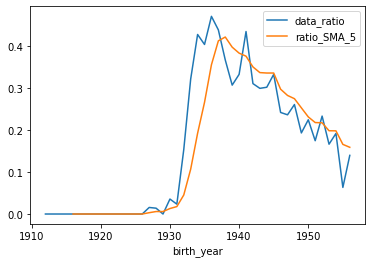

In [41]:
plot_graphs('birth_year','new_middle')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/3540053715.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


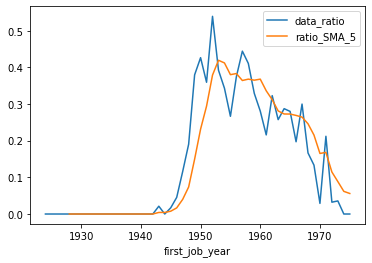

In [42]:
plot_graphs('first_job_year','new_middle')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/3540053715.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


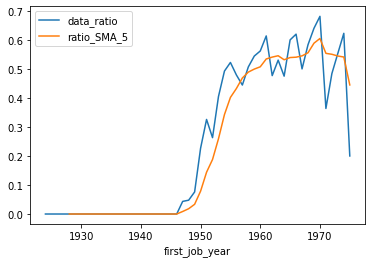

In [43]:
plot_graphs('first_job_year','new_high')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/3540053715.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


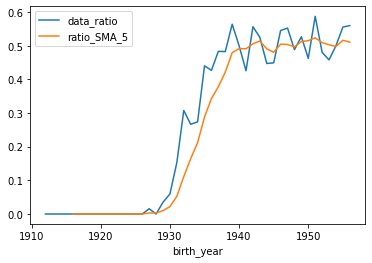

In [44]:
plot_graphs('birth_year','new_high')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/3540053715.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


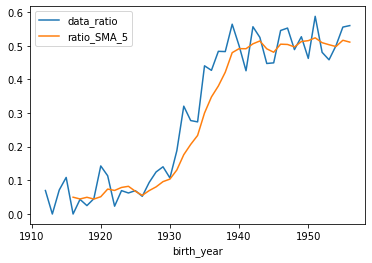

In [45]:
plot_graphs('birth_year','high')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/3540053715.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


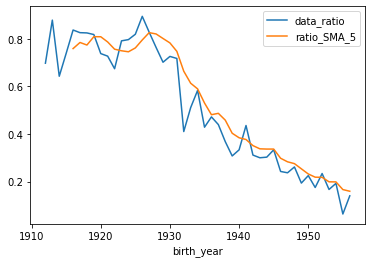

In [46]:
plot_graphs('birth_year','middle')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/3540053715.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


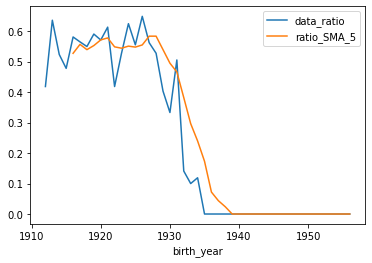

In [47]:
plot_graphs('birth_year','old_upper_elementary')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/3540053715.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


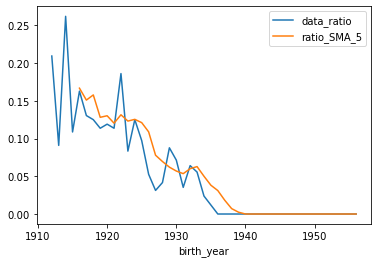

In [48]:
plot_graphs('birth_year','old_elementary')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/3540053715.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


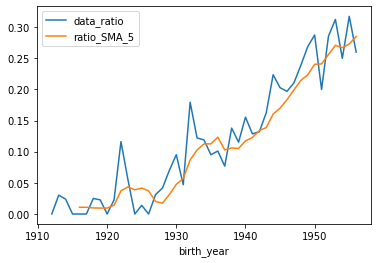

In [49]:
plot_graphs('birth_year','college')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/3540053715.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


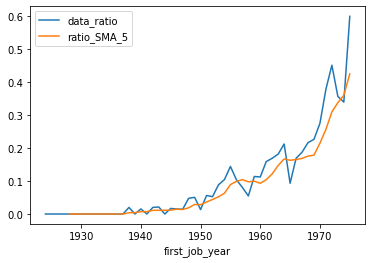

In [50]:
plot_graphs('first_job_year','college')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/3540053715.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


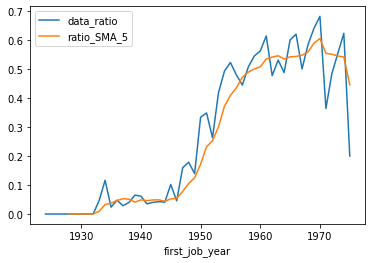

In [51]:
plot_graphs('first_job_year','high')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/3540053715.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


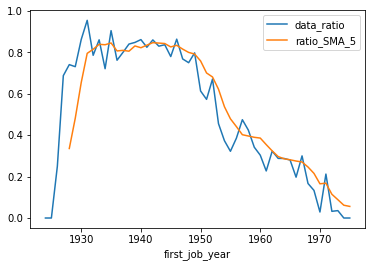

In [52]:
plot_graphs('first_job_year','middle')

In [53]:
def plot_graphs_subsample(year_column, data_column, subsample):
    
    _df = df[[year_column, data_column, subsample,'counts']].copy()
    _df = _df.loc[_df[subsample] == 1,:]
    
    if year_column == 'first_job_year':
        _df = _df.loc[_df[year_column] <= 1975]
    
    _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()
    _df_group['data_ratio'] = _df_group[data_column] / _df_group.counts
    _df_group['ratio_SMA_5'] = _df_group['data_ratio'].rolling(window = 5).mean()
    
    fig, ax = plt.subplots()
    _df_group.plot(x = year_column, y = 'data_ratio', ax = ax)
    _df_group.plot(x = year_column, y = 'ratio_SMA_5', ax = ax)
    plt.show()

In [54]:
def create_df_subsample(year_column, data_column, subsample):
    
    _df = df[[year_column, data_column, subsample,'counts']].copy()
    _df = _df.loc[_df[subsample] == 1,:]
    
    if year_column == 'first_job_year':
        _df = _df.loc[_df[year_column] <= 1975]
    
    _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()
    _df_group['data_ratio'] = _df_group[data_column] / _df_group.counts
    _df_group['ratio_SMA_5'] = _df_group['data_ratio'].rolling(window = 5).mean()
    
    return _df_group

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/703713534.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


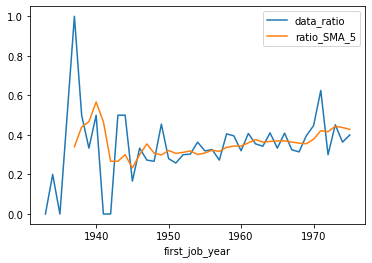

In [55]:
plot_graphs_subsample('first_job_year', 'moved_pref_first_job', 'high')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/703713534.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


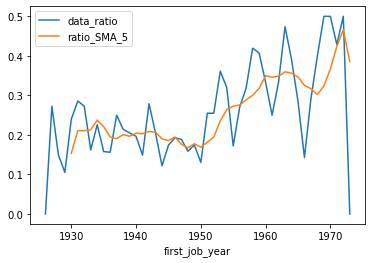

In [56]:
plot_graphs_subsample('first_job_year', 'moved_pref_first_job', 'middle')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/703713534.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


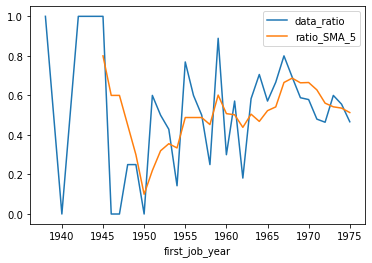

In [57]:
plot_graphs_subsample('first_job_year', 'moved_pref_first_job', 'college')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/703713534.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


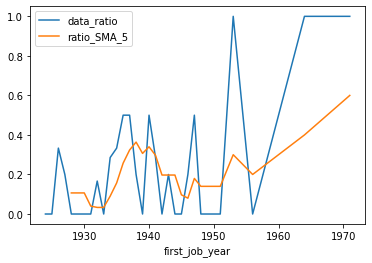

In [58]:
plot_graphs_subsample('first_job_year', 'moved_pref_first_job', 'old_elementary')

In [59]:
df[df.high == 1]

,Unnamed: 0,sampleno,kyojuuchi,q1,q2,q3,q3_toshiruikei,q4_1,q4_2,q5_1,...,old_college,high,middle,college,first_job_school,first_job_pub_emp,first_job_conn,first_job_adv,first_job_other,first_job_self
2,2,3,10,49,1,10,4,6,3,1,...,0,1,0,0,1,0,0,0,0,0
7,7,8,10,55,1,10,4,3,2,3,...,0,1,0,0,1,0,0,0,0,0
14,14,15,10,42,2,40,1,6,2,4,...,0,1,0,0,1,0,0,0,0,0
20,20,21,10,49,1,10,4,3,1,2,...,0,1,0,0,0,0,0,0,0,1
33,33,34,10,31,2,7,2,3,3,1,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,4194,4195,2,31,2,2,4,3,2,2,...,0,1,0,0,0,0,1,0,0,0
4197,4197,4198,2,29,2,2,4,3,1,3,...,0,1,0,0,1,0,0,0,0,0
4198,4198,4199,2,30,2,2,2,8,7,5,...,0,1,0,0,0,0,1,0,0,0
4216,4216,4217,47,56,2,50,7,4,2,2,...,0,1,0,0,0,0,0,0,0,1


In [60]:
df[df.middle == 1]

,Unnamed: 0,sampleno,kyojuuchi,q1,q2,q3,q3_toshiruikei,q4_1,q4_2,q5_1,...,old_college,high,middle,college,first_job_school,first_job_pub_emp,first_job_conn,first_job_adv,first_job_other,first_job_self
0,0,1,10,53,1,10,4,4,3,3,...,0,0,1,0,1,0,0,0,0,0
1,1,2,10,61,1,10,4,4,3,3,...,0,0,1,0,0,0,1,0,0,0
3,3,4,10,69,1,10,4,9,6,6,...,0,0,1,0,0,0,1,0,0,0
4,4,5,10,45,1,10,4,4,1,3,...,0,0,1,0,0,0,1,0,0,0
5,5,6,10,67,2,10,4,7,3,3,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4211,4211,4212,2,47,1,2,4,7,4,2,...,0,0,1,0,0,0,0,0,0,1
4212,4212,4213,2,47,1,2,4,6,3,3,...,0,0,1,0,0,0,0,0,0,1
4213,4213,4214,2,48,1,2,4,3,3,3,...,0,0,1,0,0,0,0,0,0,1
4238,4238,4239,47,49,2,46,4,6,6,4,...,0,0,1,0,0,0,0,0,0,0


/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/703713534.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


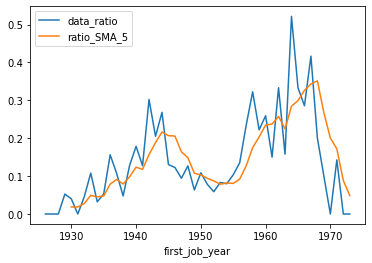

In [61]:
plot_graphs_subsample('first_job_year', 'first_job_school', 'middle')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/703713534.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


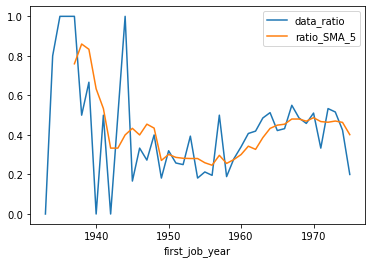

In [62]:
plot_graphs_subsample('first_job_year', 'first_job_school', 'high')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/703713534.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


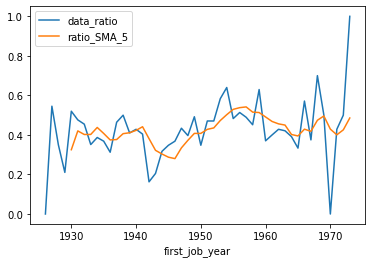

In [63]:
plot_graphs_subsample('first_job_year', 'first_job_conn', 'middle')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/703713534.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


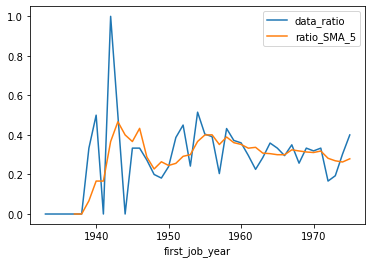

In [64]:
plot_graphs_subsample('first_job_year', 'first_job_conn', 'high')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/703713534.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


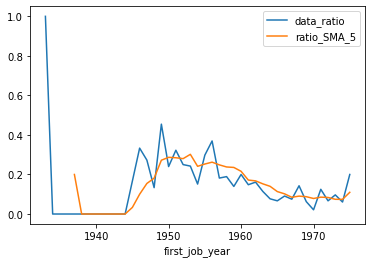

In [65]:
plot_graphs_subsample('first_job_year', 'first_job_self', 'high')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/703713534.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


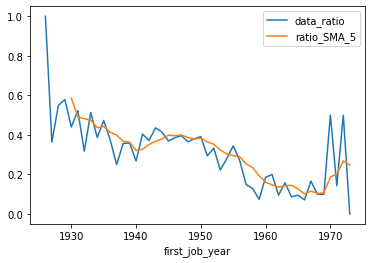

In [66]:
plot_graphs_subsample('first_job_year', 'first_job_self', 'middle')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/703713534.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


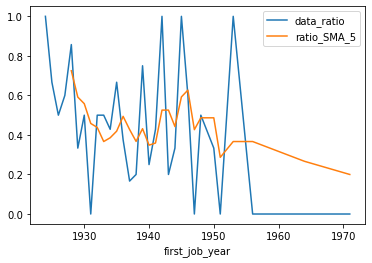

In [67]:
plot_graphs_subsample('first_job_year', 'first_job_self', 'old_elementary')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/703713534.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


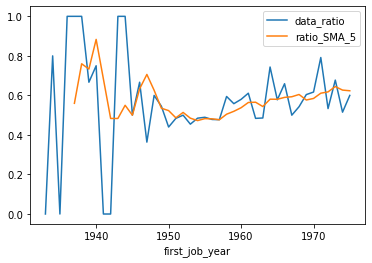

In [68]:
plot_graphs_subsample('first_job_year', 'moved_first_job', 'high')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/703713534.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


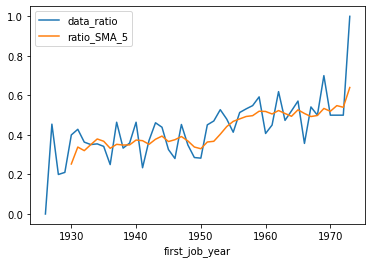

In [69]:
plot_graphs_subsample('first_job_year', 'moved_first_job', 'middle')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/703713534.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


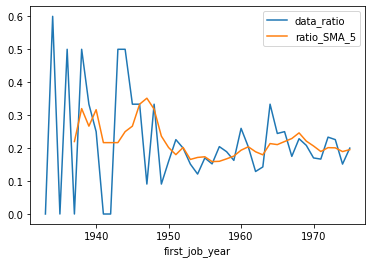

In [70]:
plot_graphs_subsample('first_job_year', 'moved_within_pref_first_job', 'high')

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/703713534.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


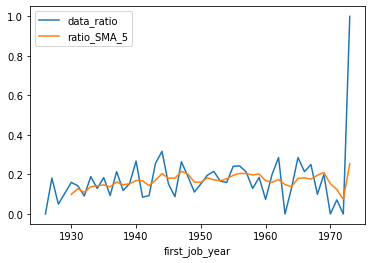

In [71]:
plot_graphs_subsample('first_job_year', 'moved_within_pref_first_job', 'middle')

In [74]:
df1 = create_df_subsample('first_job_year', 'moved_pref_first_job', 'high')
df1

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/3959292645.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


,first_job_year,moved_pref_first_job,counts,data_ratio,ratio_SMA_5
0,1933,0,2,0.000000,NaN
1,1934,1,5,0.200000,NaN
2,1935,0,1,0.000000,NaN
3,1936,1,2,0.500000,NaN
4,1937,1,1,1.000000,0.340000
5,1938,1,2,0.500000,0.440000
6,1939,1,3,0.333333,0.466667
7,1940,2,4,0.500000,0.566667
8,1941,0,2,0.000000,0.466667
9,1942,0,2,0.000000,0.266667


In [76]:
df1.loc[(df1.first_job_year <= 1940) & (df1.first_job_year >= 1930)].data_ratio.mean()

0.37916666666666665

In [77]:
df1.loc[(df1.first_job_year <= 1960) & (df1.first_job_year >= 1950)].data_ratio.mean()

0.322131690075421

In [78]:
df1.loc[(df1.first_job_year <= 1970) & (df1.first_job_year >= 1960)].data_ratio.mean()

0.3690646791709062

In [84]:
df2 = create_df_subsample('first_job_year', 'moved_pref_first_job', 'college')
df2

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/3959292645.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


,first_job_year,moved_pref_first_job,counts,data_ratio,ratio_SMA_5
0,1938,1,1,1.000000,NaN
1,1940,0,1,0.000000,NaN
2,1942,1,1,1.000000,NaN
3,1943,1,1,1.000000,NaN
4,1945,1,1,1.000000,0.800000
5,1946,0,1,0.000000,0.600000
6,1947,0,1,0.000000,0.600000
7,1948,1,4,0.250000,0.450000
8,1949,1,4,0.250000,0.300000
9,1950,0,1,0.000000,0.100000


In [85]:
df2.loc[(df2.first_job_year <= 1940) & (df2.first_job_year >= 1930)].data_ratio.mean()

0.5

In [86]:
df2.loc[(df2.first_job_year <= 1960) & (df2.first_job_year >= 1950)].data_ratio.mean()

0.4526862026862027

In [87]:
df2.loc[(df2.first_job_year <= 1970) & (df2.first_job_year >= 1960)].data_ratio.mean()

0.5672770938602629

In [88]:
df2.loc[(df2.first_job_year <= 1975) & (df2.first_job_year >= 1960)].data_ratio.mean()

0.5504097480606769

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/703713534.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


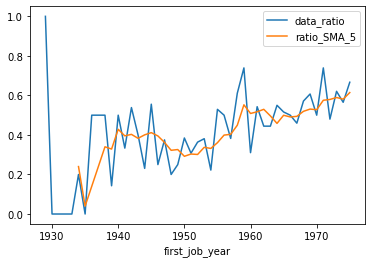

In [91]:
plot_graphs_subsample('first_job_year', 'moved_pref_first_job', 'first_job_school')

In [111]:
df2 = create_df_subsample('first_job_year', 'moved_pref_first_job', 'first_job_school')
df2

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/3959292645.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


,first_job_year,moved_pref_first_job,counts,data_ratio,ratio_SMA_5
0,1929,1,1,1.000000,NaN
1,1930,0,1,0.000000,NaN
2,1932,0,1,0.000000,NaN
3,1933,0,5,0.000000,NaN
4,1934,1,5,0.200000,0.240000
5,1935,0,3,0.000000,0.040000
6,1936,4,8,0.500000,0.140000
7,1937,2,4,0.500000,0.240000
8,1938,2,4,0.500000,0.340000
9,1939,1,7,0.142857,0.328571


In [112]:
df2.data_ratio.mean()

0.42206644868301657

In [113]:
df2.loc[(df2.first_job_year <= 1940) & (df2.first_job_year >= 1930)].data_ratio.mean()

0.23428571428571426

In [117]:
df2.loc[(df2.first_job_year <= 1960) & (df2.first_job_year >= 1950)].data_ratio.mean()

0.4301336125891763

In [118]:
df2.loc[(df2.first_job_year <= 1970) & (df2.first_job_year >= 1955)].data_ratio.mean()

0.513016064462329

In [114]:
df2.loc[(df2.first_job_year <= 1960) & (df2.first_job_year >= 1950)].data_ratio.mean()

0.4301336125891763

In [115]:
df2.loc[(df2.first_job_year <= 1970) & (df2.first_job_year >= 1960)].data_ratio.mean()

0.49511370723829007

In [116]:
df2.loc[(df2.first_job_year <= 1975) & (df2.first_job_year >= 1960)].data_ratio.mean()

0.5323721829717016

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/703713534.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


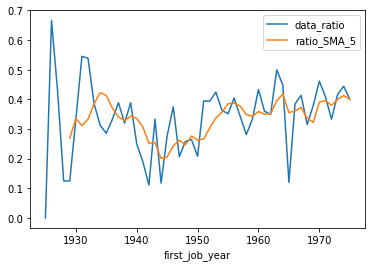

In [92]:
plot_graphs_subsample('first_job_year', 'moved_pref_first_job', 'first_job_conn')

In [124]:
df2 = create_df_subsample('first_job_year', 'moved_pref_first_job', 'first_job_conn')
df2

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/3959292645.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


,first_job_year,moved_pref_first_job,counts,data_ratio,ratio_SMA_5
0,1925,0,1,0.000000,NaN
1,1926,2,3,0.666667,NaN
2,1927,3,7,0.428571,NaN
3,1928,1,8,0.125000,NaN
4,1929,1,8,0.125000,0.269048
5,1930,5,15,0.333333,0.335714
6,1931,6,11,0.545455,0.311472
7,1932,7,13,0.538462,0.333450
8,1933,5,13,0.384615,0.385373
9,1934,5,16,0.312500,0.422873


In [125]:
df2.loc[(df2.first_job_year <= 1940) & (df2.first_job_year >= 1930)].data_ratio.mean()

0.371017290790018

In [130]:
df2.loc[(df2.first_job_year <= 1950) & (df2.first_job_year >= 1940)].data_ratio.mean()

0.2357587050055806

In [126]:
df2.loc[(df2.first_job_year <= 1960) & (df2.first_job_year >= 1950)].data_ratio.mean()

0.35743412935398583

In [127]:
df2.loc[(df2.first_job_year <= 1970) & (df2.first_job_year >= 1960)].data_ratio.mean()

0.3787869057742016

In [128]:
df2.loc[(df2.first_job_year <= 1975) & (df2.first_job_year >= 1960)].data_ratio.mean()

0.3856369573157232

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/703713534.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


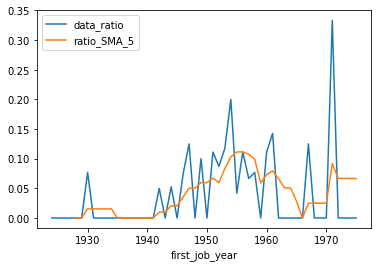

In [129]:
plot_graphs_subsample('first_job_year', 'moved_pref_first_job', 'first_job_self')

In [119]:
df2 = create_df_subsample('first_job_year', 'moved_pref_first_job', 'first_job_self')
df2

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/3959292645.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


,first_job_year,moved_pref_first_job,counts,data_ratio,ratio_SMA_5
0,1924,0,1,0.000000,NaN
1,1925,0,2,0.000000,NaN
2,1926,0,5,0.000000,NaN
3,1927,0,7,0.000000,NaN
4,1928,0,17,0.000000,0.000000
5,1929,0,13,0.000000,0.000000
6,1930,1,13,0.076923,0.015385
7,1931,0,11,0.000000,0.015385
8,1932,0,10,0.000000,0.015385
9,1933,0,23,0.000000,0.015385


In [120]:
df2.loc[(df2.first_job_year <= 1940) & (df2.first_job_year >= 1930)].data_ratio.mean()

0.006993006993006993

In [121]:
df2.loc[(df2.first_job_year <= 1960) & (df2.first_job_year >= 1950)].data_ratio.mean()

0.08392666583203669

In [121]:
df2.loc[(df2.first_job_year <= 1960) & (df2.first_job_year >= 1950)].data_ratio.mean()

0.08392666583203669

In [122]:
df2.loc[(df2.first_job_year <= 1970) & (df2.first_job_year >= 1960)].data_ratio.mean()

0.03445165945165945

In [123]:
df2.loc[(df2.first_job_year <= 1975) & (df2.first_job_year >= 1960)].data_ratio.mean()

0.0445188492063492

In [147]:
df2 = create_df_subsample('first_job_year', 'first_job_self', 'middle')
df2

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/3959292645.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


,first_job_year,first_job_self,counts,data_ratio,ratio_SMA_5
0,1926,2,2,1.000000,NaN
1,1927,4,11,0.363636,NaN
2,1928,11,20,0.550000,NaN
3,1929,11,19,0.578947,NaN
4,1930,11,25,0.440000,0.586517
5,1931,11,21,0.523810,0.491279
6,1932,7,22,0.318182,0.482188
7,1933,19,37,0.513514,0.474890
8,1934,12,31,0.387097,0.436520
9,1935,18,38,0.473684,0.443257


In [148]:
df2.loc[(df2.first_job_year <= 1940) & (df2.first_job_year >= 1930)].data_ratio.mean()

0.3877509271999163

In [149]:
df2.loc[(df2.first_job_year <= 1975) & (df2.first_job_year >= 1930)].data_ratio.mean()

0.28817071225238183

In [150]:
df2.loc[(df2.first_job_year <= 1960) & (df2.first_job_year >= 1950)].data_ratio.mean()

0.24302755404128853

In [151]:
df2.loc[(df2.first_job_year <= 1960) & (df2.first_job_year >= 1950)].data_ratio.mean()

0.24302755404128853

In [152]:
df2.loc[(df2.first_job_year <= 1970) & (df2.first_job_year >= 1960)].data_ratio.mean()

0.15987344293980452

In [153]:
df2.loc[(df2.first_job_year <= 1970) & (df2.first_job_year >= 1965)].data_ratio.mean()

0.1722222222222222

In [181]:
df2 = create_df_subsample('first_job_year', 'first_job_conn', 'middle')
df2

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/3959292645.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


,first_job_year,first_job_conn,counts,data_ratio,ratio_SMA_5
0,1926,0,2,0.000000,NaN
1,1927,6,11,0.545455,NaN
2,1928,7,20,0.350000,NaN
3,1929,4,19,0.210526,NaN
4,1930,13,25,0.520000,0.325196
5,1931,10,21,0.476190,0.420434
6,1932,10,22,0.454545,0.402252
7,1933,13,37,0.351351,0.402523
8,1934,12,31,0.387097,0.437837
9,1935,14,38,0.368421,0.407521


In [182]:
df2.loc[(df2.first_job_year <= 1940) & (df2.first_job_year >= 1930)].data_ratio.mean()

0.42483806018417847

In [183]:
df2.loc[(df2.first_job_year <= 1975) & (df2.first_job_year >= 1930)].data_ratio.mean()

0.43864565270640193

In [184]:
df2.loc[(df2.first_job_year <= 1960) & (df2.first_job_year >= 1950)].data_ratio.mean()

0.4954166027667932

In [185]:
df2.loc[(df2.first_job_year <= 1960) & (df2.first_job_year >= 1950)].data_ratio.mean()

0.4954166027667932

In [186]:
df2.loc[(df2.first_job_year <= 1970) & (df2.first_job_year >= 1960)].data_ratio.mean()

0.40827824391897616

In [167]:
df2.loc[(df2.first_job_year <= 1970) & (df2.first_job_year >= 1965)].data_ratio.mean()

0.3147355009057136

In [189]:
df2 = create_df_subsample('first_job_year', 'first_job_conn', 'high')
df2

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_9346/3959292645.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_group = _df.groupby([year_column])[data_column, 'counts'].sum().reset_index()


,first_job_year,first_job_conn,counts,data_ratio,ratio_SMA_5
0,1933,0,2,0.000000,NaN
1,1934,0,5,0.000000,NaN
2,1935,0,1,0.000000,NaN
3,1936,0,2,0.000000,NaN
4,1937,0,1,0.000000,0.000000
5,1938,0,2,0.000000,0.000000
6,1939,1,3,0.333333,0.066667
7,1940,2,4,0.500000,0.166667
8,1941,0,2,0.000000,0.166667
9,1942,2,2,1.000000,0.366667


In [190]:
df2.loc[(df2.first_job_year <= 1940) & (df2.first_job_year >= 1930)].data_ratio.mean()

0.10416666666666666

In [191]:
df2.loc[(df2.first_job_year <= 1975) & (df2.first_job_year >= 1930)].data_ratio.mean()

0.2815263174809927

In [192]:
df2.loc[(df2.first_job_year <= 1960) & (df2.first_job_year >= 1950)].data_ratio.mean()

0.3635730099070936

In [193]:
df2.loc[(df2.first_job_year <= 1970) & (df2.first_job_year >= 1960)].data_ratio.mean()

0.3104731270938296

In [194]:
df2.loc[(df2.first_job_year <= 1975) & (df2.first_job_year >= 1945)].data_ratio.mean()

0.3152354296241727